In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import astropy.units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

%matplotlib inline

In [3]:
dcdf = pd.read_table('candidate_objects.dat', names=['field',
'candidate id',
'object id',
'object ra', 
'object dec', 
'object MJD', 
'object filter', 
'object magnitude', 
'object magnitude error', 
'object real/bogus score', 
'exposure id'], comment='#', delim_whitespace=True)

dcdf

,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id
0,COSMOS,DC21jyeo,1244336,148.627940,1.020521,59360.983202,g,21.359,0.084,0.956,1107
1,COSMOS,DC21jyeo,1244619,148.628248,1.020494,59360.984455,g,21.596,0.110,0.612,1108
2,COSMOS,DC21jvtr,1231065,148.394095,1.407216,59358.011504,g,18.943,0.009,1.000,1059
3,COSMOS,DC21jvtr,1232660,148.394358,1.407301,59358.012786,g,18.932,0.010,0.998,1060
4,COSMOS,DC21jvtr,1233917,148.394618,1.407363,59358.014054,r,18.440,0.005,1.000,1061
...,...,...,...,...,...,...,...,...,...,...,...
5663,ELAIS,DC21dreor,11448783,8.446305,-43.034973,59546.207082,g,22.297,0.073,0.924,5377
5664,ELAIS,DC22dvrhc,11563818,8.768651,-44.225484,59572.079390,g,22.786,0.083,0.967,5858
5665,ELAIS,DC22dvrhc,11572433,8.768626,-44.225219,59572.104555,g,22.809,0.090,0.682,5876
5666,ELAIS,DC22dvris,11563888,8.292958,-44.349343,59572.079390,g,22.893,0.096,0.598,5858


In [4]:
dcdf.shape

(5668, 11)

In [5]:
#Are all object IDs unique?
dcdf.shape[0] == dcdf['object id'].unique().shape[0]

True

In [6]:
#What fields are included?
dcdf['field'].unique()

array(['COSMOS', 'ELAIS'], dtype=object)

Add airmasses from exposures.dat file:

In [7]:
expdf = pd.read_table('exposures.dat', names=[
'field',
'exposure calendar date',
'filename base', 
'exposure id', 
'modified julian date', 
'filter', 
'mean limiting magnitude',
'mean seeing',
'mean sky background',
'total number of objects',
'total number of objects with R/B>0.6', 
'airmass',
], usecols=['exposure id', 'airmass', 'mean seeing'], comment='#', delim_whitespace=True)

In [8]:
dcdfnew = pd.merge(dcdf, expdf, on=['exposure id'], how='left')

In [11]:
dcdf.shape, dcdfnew.shape

((5668, 11), (5668, 13))

In [12]:
from IPython.display import display

for id in dcdfnew['candidate id'].unique()[0:5]:
    display(dcdfnew[dcdfnew['candidate id'] == id])

,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass
0,COSMOS,DC21jyeo,1244336,148.627940,1.020521,59360.983202,g,21.359,0.084,0.956,1107,1.116,1.24
1,COSMOS,DC21jyeo,1244619,148.628248,1.020494,59360.984455,g,21.596,0.110,0.612,1108,1.115,1.24


,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass
2,COSMOS,DC21jvtr,1231065,148.394095,1.407216,59358.011504,g,18.943,0.009,1.000,1059,1.169,1.31
3,COSMOS,DC21jvtr,1232660,148.394358,1.407301,59358.012786,g,18.932,0.010,0.998,1060,1.185,1.31
4,COSMOS,DC21jvtr,1233917,148.394618,1.407363,59358.014054,r,18.440,0.005,1.000,1061,0.985,1.32


,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass
5,COSMOS,DC21bcfau,3089222,148.467440,1.392566,59369.995322,g,21.713,0.034,1.0,1421,0.946,1.38
6,COSMOS,DC21bcfau,3089081,148.467843,1.392517,59369.996585,g,21.710,0.032,1.0,1422,0.917,1.39
7,COSMOS,DC21bcfau,3094437,148.468223,1.392466,59369.997844,r,21.053,0.029,1.0,1423,0.934,1.40


,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass
8,COSMOS,DC21fmml,10047388,148.914762,0.793344,59319.041709,i,21.204,0.037,1.0,2004,0.986,1.18
9,COSMOS,DC21fmml,587061,148.915011,0.793717,59319.051927,g,21.809,0.035,1.0,479,1.004,1.18
10,COSMOS,DC21fmml,578186,148.915040,0.793784,59319.052961,r,21.278,0.024,1.0,480,0.879,1.18
11,COSMOS,DC21fmml,583338,148.915315,0.794233,59319.064989,g,21.875,0.042,1.0,489,1.151,1.18


,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass
12,COSMOS,DC21jrzg,1210241,148.952954,0.800502,59355.987286,g,21.120,0.060,0.872,1038,1.261,1.22
13,COSMOS,DC21jrzg,1212223,148.953180,0.800468,59355.988541,g,21.156,0.061,0.909,1039,1.219,1.22


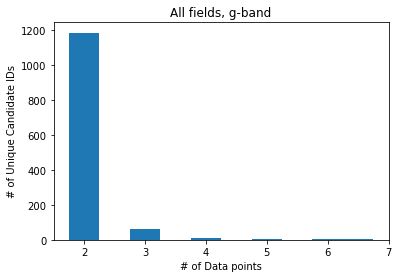

In [12]:
h = []

for i, id in enumerate(dcdf['candidate id'].unique()):
    h.append(len(dcdf[(dcdf['candidate id'] == id) & (dcdf['object filter'] == 'g')]))

plt.hist(h, align='left')
plt.title('All fields, g-band')
plt.xlabel('# of Data points')
plt.ylabel('# of Unique Candidate IDs');

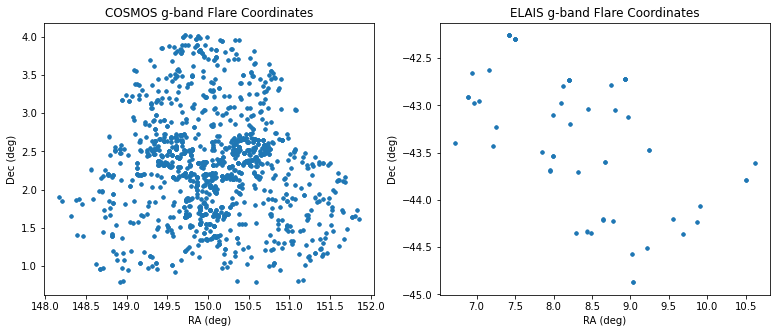

In [15]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

ra1 = dcdf[(dcdf['field'] == 'COSMOS') & (dcdf['object filter'] == 'g')]['object ra']
dec1 = dcdf[(dcdf['field'] == 'COSMOS') & (dcdf['object filter'] == 'g')]['object dec']

ra2 = dcdf[(dcdf['field'] == 'ELAIS') & (dcdf['object filter'] == 'g')]['object ra']
dec2 = dcdf[(dcdf['field'] == 'ELAIS') & (dcdf['object filter'] == 'g')]['object dec']

ax[0].scatter(ra1, dec1, s=10)
ax[0].set_xlabel('RA (deg)')
ax[0].set_ylabel('Dec (deg)')
ax[0].set_title('COSMOS g-band Flare Coordinates');

ax[1].scatter(ra2, dec2, s=10)
ax[1].set_xlabel('RA (deg)')
ax[1].set_ylabel('Dec (deg)')
ax[1].set_title('ELAIS g-band Flare Coordinates');
plt.savefig('Figures/decam_coords.png', dpi=300, bbox_inches='tight')

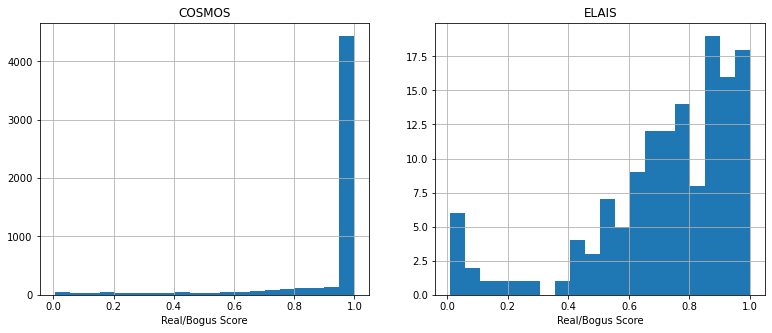

In [16]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

dcdf[dcdf['field'] == 'COSMOS']['object real/bogus score'].hist(bins=20, ax=ax[0])
ax[0].set_xlabel('Real/Bogus Score')
ax[0].set_title('COSMOS')


dcdf[dcdf['field'] == 'ELAIS']['object real/bogus score'].hist(bins=20, ax=ax[1])
ax[1].set_xlabel('Real/Bogus Score')
ax[1].set_title('ELAIS')
plt.savefig('Figures/rbdist.png', dpi=300, bbox_inches='tight')

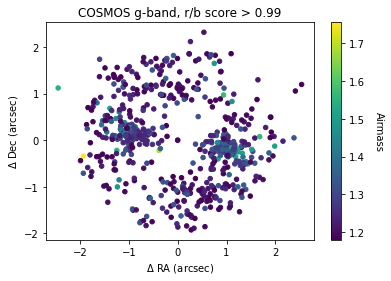

In [17]:
def dcoord(dcdf, field, thr, filt):

        d_ra = np.zeros_like(dcdf[dcdf['field'] == field]['candidate id'].unique())
        d_dec = np.zeros_like(dcdf[dcdf['field'] == field]['candidate id'].unique())
        d_am = np.zeros_like(dcdf[dcdf['field'] == field]['candidate id'].unique())
        
        for i,id in enumerate(dcdf[dcdf['field'] == field]['candidate id'].unique()):
                #print('Candidate ID: {}'.format(id))

                if np.isnan(dcdf.iloc[i]['airmass']):
                        continue

                subdf = dcdf[(dcdf['field'] == field) & (dcdf['object filter'] == filt) & 
                             (dcdf['object real/bogus score'] > thr) & (dcdf['candidate id'] == id)]

                if subdf.shape[0] == 2:

                        ra_i = subdf[subdf['object magnitude'] == subdf['object magnitude'].min()]['object ra'].values
                        dec_i = subdf[subdf['object magnitude'] == subdf['object magnitude'].min()]['object dec'].values
                        ra_f = subdf[subdf['object magnitude'] == subdf['object magnitude'].max()]['object ra'].values
                        dec_f = subdf[subdf['object magnitude'] == subdf['object magnitude'].max()]['object dec'].values
                        am_i = subdf[subdf['object magnitude'] == subdf['object magnitude'].min()]['airmass'].values
                        am_f = subdf[subdf['object magnitude'] == subdf['object magnitude'].max()]['airmass'].values
                     
                        dra = ra_f - ra_i
                        ddec = dec_f - dec_i

                        if dra.size > 0:
                                d_ra[i] = dra[0]

                        if ddec.size > 0:
                                d_dec[i] = ddec[0]

                        d_am[i] = np.mean([am_f, am_i])


                else:
                        d_ra[i] = np.nan
                        d_dec[i] = np.nan
                        d_am[i] = np.nan

        fig = plt.figure()
        ax = plt.axes()
        s = ax.scatter(d_ra*3600, d_dec*3600, c=d_am, s=20)
        ax.set_xlabel(r'$\Delta$ RA (arcsec)')
        ax.set_ylabel(r'$\Delta$ Dec (arcsec)')
        ax.set_title('{0} {1}-band, r/b score > {2}'.format(field,filt,thr))
        cbar = fig.colorbar(s)
        cbar.set_label('Airmass', rotation=270, labelpad=20)
        fig.savefig('Figures/{0}_rb{1}_deltacoord.png'.format(field, thr), dpi=300, bbox_inches='tight')
        return ax

_ = dcoord(dcdfnew, 'COSMOS', 0.99, 'g')

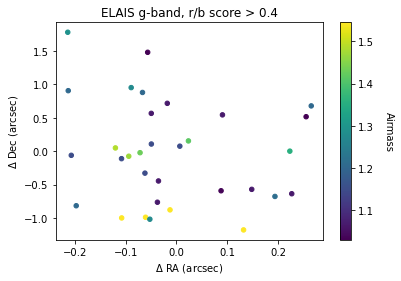

In [18]:
_ = dcoord(dcdfnew, 'ELAIS', 0.4, 'g')

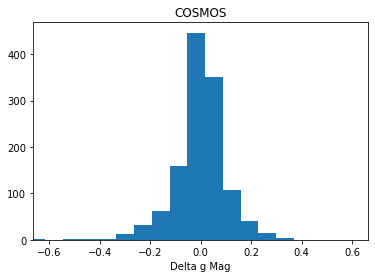

In [19]:
def dmag_hist(field, band, bins):

    h = []

    for i,id in enumerate(dcdf[dcdf['field'] == field]['candidate id'].unique()):

        subdf = dcdf[(dcdf['object filter'] == band) & (dcdf['candidate id'] == id)]

        if subdf.shape[0] > 1:
            
            h.append(subdf[subdf['object MJD'] == subdf['object MJD'].max()]['object magnitude'].values[0] - 
                    subdf[subdf['object MJD'] == subdf['object MJD'].min()]['object magnitude'].values[0])
    h = np.array(h)
    plt.hist(h, bins=bins);
    plt.xlim(-5*h.std(),5*h.std())
    plt.xlabel('Delta {} Mag'.format(band))
    plt.title(field)
    return h

h = dmag_hist('COSMOS', 'g', bins=50)


257


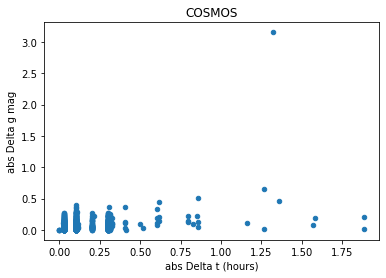

In [21]:
def dmag_plot(field, band):

    dmag = []
    dtime = []

    for i,id in enumerate(dcdf[dcdf['field'] == field]['candidate id'].unique()):

        subdf = dcdf[(dcdf['object filter'] == band) & (dcdf['candidate id'] == id)]

        if subdf.shape[0] > 1:
            
            dtime.append(subdf[subdf['object magnitude'] == subdf['object magnitude'].max()]['object MJD'].values[0] - 
                    subdf[subdf['object magnitude'] == subdf['object magnitude'].min()]['object MJD'].values[0])

            dmag.append(subdf['object magnitude'].max() - subdf['object magnitude'].min())
            
    dmag = np.array(np.abs(dmag))
    dtime = np.array(np.abs(dtime) * 24)
    
    print(np.where(dmag == dmag.max())[0][0])

    plt.scatter(dtime, dmag, s=20);
    #plt.ylim(0.5,-3.5)
    plt.ylabel('abs Delta {} mag'.format(band))
    plt.xlabel('abs Delta t (hours)')
    plt.title(field)
    return dmag, dtime
dmag, dtime = dmag_plot('COSMOS', 'g');

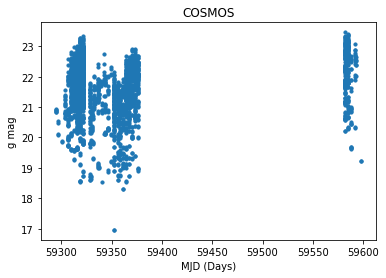

In [43]:
def dc_lcv(field, filt, log=False):  
    if log==True:
        plt.scatter(dcdf[(dcdf['field']==field) & (dcdf['object filter']==filt)]['object MJD'].values, 
                    dcdf[(dcdf['field']=='COSMOS') & (dcdf['object filter']=='g')]['object magnitude'].values, s=10)
        plt.ylabel('log {} mag'.format(filt))

    else:
        plt.scatter(dcdf[(dcdf['field']==field) & (dcdf['object filter']==filt)]['object MJD'].values, 
                    dcdf[(dcdf['field']=='COSMOS') & (dcdf['object filter']=='g')]['object magnitude'].values, s=10)
        plt.ylabel('{} mag'.format(filt))
   
    plt.xlabel('MJD (Days)')
    
    plt.title('{}'.format(field))

dc_lcv('COSMOS', 'g')

In [25]:
np.isnan(np.full(10, np.nan)).all()

True

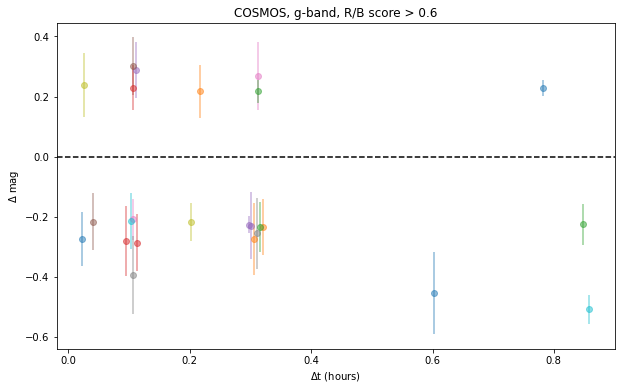

In [112]:
import warnings
warnings.filterwarnings("ignore")

def dmdt(df, field, rb_thr, filt):

        plt.figure(figsize=(10,6))
        
        for id in df[df['field'] == field]['candidate id'].unique():

                subdf = df[(df['field'] == field) & (df['object filter'] == filt) & 
                             (df['object real/bogus score'] > rb_thr) & (df['candidate id'] == id)]

                if subdf.shape[0] > 1:
                        dmag = np.sqrt((subdf['object magnitude error'].values[1:]) ** 2 
                                     + (subdf['object magnitude error'].values[:-1]) ** 2)

                        mdiff = np.diff(subdf['object magnitude'])
                        indx = ((np.abs(mdiff) - 2 * dmag) < 0) | (np.abs(mdiff) < 0.2)
                        mdiff[indx] = np.nan
                        tdiff = np.diff(subdf['object MJD']) * 24 + np.random.normal(0.0, 0.01, 
                                np.diff(subdf['object MJD']).shape)

                        if not np.isnan(mdiff).all():
                                plt.errorbar(tdiff, mdiff, yerr=dmag, marker='o', ls='none', alpha=0.5, label=id)

        plt.axhline(0, color='k', ls='--')
        #plt.xlim(0,0.4)
        plt.xlabel(r'$\Delta$t (hours)')
        plt.ylabel(r'$\Delta$ mag')
        plt.title('{0}, {1}-band, R/B score > {2}'.format(field, filt, rb_thr))
        #plt.legend(fontsize=8)
        plt.savefig('Figures/dmdt.png', dpi=300, bbox_inches='tight')

dmdt(dcdfnew, 'COSMOS', 0.6, 'g');

In [104]:
slope_thresh = 0.2 / 0.5  #-0.2 magnitude change over 1/2 hour

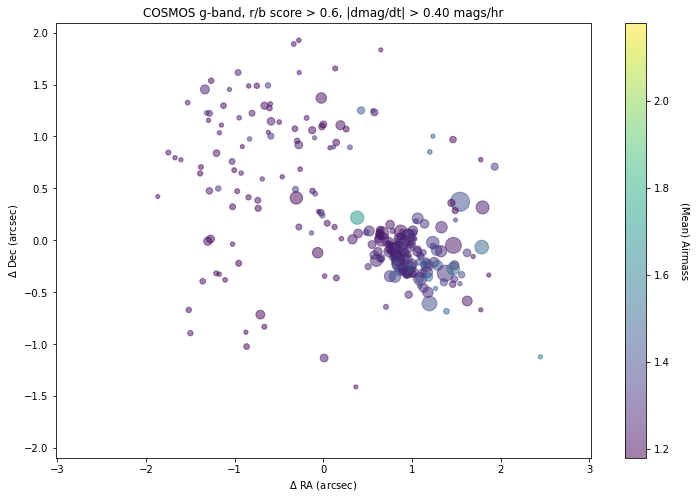

In [110]:
def dcoord2(df, field, rb_thr, s_thr, filt):

        """
        Creates delta-RA vs. delta-dec plot, comparing pairs of epochs with the most negative
        dmag/dt slope for each candidate ID. 

        Parameters
        ----------
        df : pandas dataframe
                input dataframe

        field : str
                DECAM field ('ELAIS' or 'COSMOS')

        rb_thr : float
                real/bogus score threshold. No candidate with a R/B 
                score below rb_thr will be plotted

        s_thr : float
                dmag/dt threshold

        filt : str
                DECAM filter
        """

        d_ra = np.zeros_like(df[df['field'] == field]['candidate id'].unique())
        d_dec = np.zeros_like(df[df['field'] == field]['candidate id'].unique())
        d_am = np.zeros_like(df[df['field'] == field]['candidate id'].unique())
        slopes = np.zeros_like(df[df['field'] == field]['candidate id'].unique())

        for i,id in enumerate(df[df['field'] == field]['candidate id'].unique()):

                subdf = df[(df['field'] == field) & (df['object filter'] == filt) & 
                             (df['object real/bogus score'] > rb_thr) & (df['candidate id'] == id)]

                if subdf.shape[0] > 1:
                        slope = np.diff(subdf['object magnitude'].values) / np.diff(subdf['object MJD'].values * 24)
                        high_rate = np.where((np.abs(slope) > s_thr) & (np.abs(slope) == np.abs(slope).max()))[0]

                        if len(high_rate) > 0:
                                slopes[i] = slope[high_rate][0]
                                d_ra[i] = subdf['object ra'].values[high_rate + 1] - subdf['object ra'].values[high_rate]
                                d_dec[i] = subdf['object dec'].values[high_rate + 1] - subdf['object dec'].values[high_rate]
                                d_am[i] = np.mean([subdf['airmass'].values[high_rate + 1], subdf['airmass'].values[high_rate]])
                        else:   
                                slopes[i] = np.nan
                                d_ra[i] = np.nan
                                d_dec[i] = np.nan
                                d_am[i] = np.nan
                else:
                        slopes[i] = np.nan
                        d_ra[i] = np.nan
                        d_dec[i] = np.nan
                        d_am[i] = np.nan

        pltslopes = (slopes.astype(float) * -1) * 40  #change sign, dtype and scale for plotting
        x = d_ra * 3600
        y = d_dec * 3600
        
        fig = plt.figure(figsize=(12,8))
        ax = plt.axes()
        s = ax.scatter(x, y, c=d_am, s=pltslopes, alpha=0.5)
        xabs_max = abs(np.nanmax(ax.get_xlim()))
        yabs_max = abs(np.nanmax(ax.get_ylim()))
        ax.set_xlim(-xabs_max, xabs_max)
        ax.set_ylim(-yabs_max , yabs_max)
        ax.set_xlabel(r'$\Delta$ RA (arcsec)')
        ax.set_ylabel(r'$\Delta$ Dec (arcsec)')
        ax.set_title('{0} {1}-band, r/b score > {2}, |dmag/dt| > {3:0.2f} mags/hr'.format(field, filt, rb_thr, s_thr))
        cbar = fig.colorbar(s)
        cbar.set_label('(Mean) Airmass', rotation=270, labelpad=20)
        plt.savefig('Figures/dcoord2.png', dpi=500, bbox_inches='tight')

dcoord2(dcdfnew, 'COSMOS', rb_thr=0.6, s_thr=slope_thresh, filt='g')

In [76]:
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, FK5
from astropy import units as u 
import numpy as np

def celest_to_pa(ra, dec, time, loc):
    t = Time(time, format='mjd', location=loc)
    coord = SkyCoord(ra, dec, unit=(u.degree,u.degree), frame=FK5, equinox='J2000.0')
    lat = np.deg2rad(loc.lat)
    lst = t.sidereal_time('mean')

    coor_curr = coord.transform_to(FK5(equinox=t))
    ra_curr = coor_curr.ra                                                      
    dec_curr = coor_curr.dec

    ha = ((lst.hour) - ra_curr.hour) * 15                          
    ha = np.deg2rad(ha) 

    pa = np.rad2deg(np.arctan2(np.sin(ha), np.cos(dec_curr.radian) * \
                np.tan(lat) - np.sin(dec_curr.radian) * np.cos(ha)))   

    return pa

celest_to_pa(0.0, 0.0, 55555.0, EarthLocation.of_site('Palomar'))

0.0010668707381266684


<Quantity -31.34977576 deg>